<a href="https://colab.research.google.com/github/MattRazo/CIS4290-Image-Set-Models/blob/main/Image_Set2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
  #Import TensorFlow and Libraries
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [ ]:
#Download Dataset
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
oot_path = '/content/gdrive/MyDrive/CIS4290_Group2_CNN'  #change dir to your project folder

!unzip $oot_path'ImageSet2.zip' #double checking if it's here

unzip:  cannot find or open /content/gdrive/MyDrive/CIS4290_Group2_CNNImageSet2.zip, /content/gdrive/MyDrive/CIS4290_Group2_CNNImageSet2.zip.zip or /content/gdrive/MyDrive/CIS4290_Group2_CNNImageSet2.zip.ZIP.


In [ ]:
import pathlib

In [ ]:
imageSet2 = pathlib.Path('/content/gdrive/MyDrive/Image Set 2')

In [ ]:
image_count = len(list(imageSet2.glob('*/*.jpg')))
print(image_count)

18347


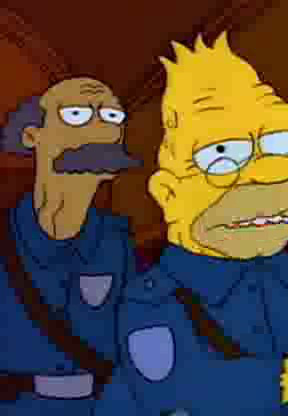

In [ ]:
exterior = list(imageSet2.glob('abraham_grampa_simpson/*'))
PIL.Image.open(str(exterior[0]))

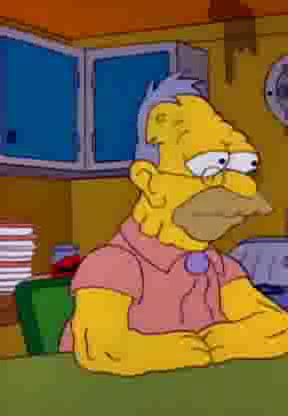

In [ ]:
PIL.Image.open(str(exterior[1]))

In [ ]:
# Initial Numbers
# img_height = 180
# img_width = 180
batch_size = 32
img_height = 256
img_width = 256

In [ ]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  imageSet2,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 18347 files belonging to 42 classes.
Using 3669 files for validation.


In [ ]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  imageSet2,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 18347 files belonging to 42 classes.
Using 3669 files for validation.


In [ ]:
class_names = train_ds.class_names
print(class_names)

['abraham_grampa_simpson', 'agnes_skinner', 'apu_nahasapeemapetilon', 'barney_gumble', 'bart_simpson', 'carl_carlson', 'charles_montgomery_burns', 'chief_wiggum', 'cletus_spuckler', 'comic_book_guy', 'disco_stu', 'edna_krabappel', 'fat_tony', 'gil', 'groundskeeper_willie', 'homer_simpson', 'kent_brockman', 'krusty_the_clown', 'lenny_leonard', 'lionel_hutz', 'lisa_simpson', 'maggie_simpson', 'marge_simpson', 'martin_prince', 'mayor_quimby', 'milhouse_van_houten', 'miss_hoover', 'moe_szyslak', 'ned_flanders', 'nelson_muntz', 'otto_mann', 'patty_bouvier', 'principal_skinner', 'professor_john_frink', 'rainier_wolfcastle', 'ralph_wiggum', 'selma_bouvier', 'sideshow_bob', 'sideshow_mel', 'snake_jailbird', 'troy_mcclure', 'waylon_smithers']


In [ ]:
class_count = len(class_names)
print(class_count)

42


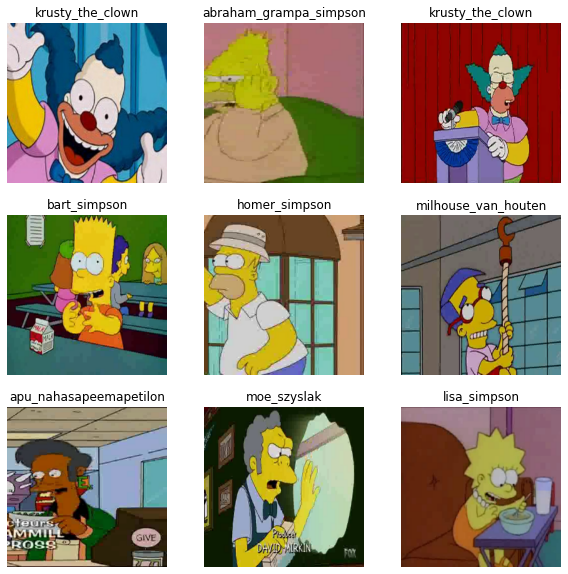

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [ ]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 256, 256, 3)
(32,)


In [ ]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [ ]:
normalization_layer = layers.experimental.preprocessing.Rescaling(1./255)

In [ ]:
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
# Notice the pixels values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image)) 

0.0 0.992448


In [ ]:
num_classes = 42

model = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_3 (Rescaling)      (None, 256, 256, 3)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 256, 256, 16)      448       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 128, 128, 16)      0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 128, 128, 32)      4640      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 64, 64, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 32, 32, 64)       

In [ ]:
epochs=10
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/10
115/115 [==============================] - 220s 2s/step - loss: 2.6916 - accuracy: 0.2390 - val_loss: 2.0417 - val_accuracy: 0.4276
Epoch 2/10
115/115 [==============================] - 214s 2s/step - loss: 1.8121 - accuracy: 0.4920 - val_loss: 1.1627 - val_accuracy: 0.7075
Epoch 3/10
115/115 [==============================] - 208s 2s/step - loss: 1.0745 - accuracy: 0.6961 - val_loss: 0.5050 - val_accuracy: 0.8782
Epoch 4/10
115/115 [==============================] - 208s 2s/step - loss: 0.3997 - accuracy: 0.8853 - val_loss: 0.0978 - val_accuracy: 0.9836
Epoch 5/10
115/115 [==============================] - 209s 2s/step - loss: 0.0877 - accuracy: 0.9763 - val_loss: 0.0450 - val_accuracy: 0.9921
Epoch 6/10
115/115 [==============================] - 209s 2s/step - loss: 0.0418 - accuracy: 0.9888 - val_loss: 0.0243 - val_accuracy: 0.9948
Epoch 7/10
115/115 [==============================] - 209s 2s/step - loss: 0.0398 - accuracy: 0.9902 - val_loss: 0.0343 - val_accuracy: 0.9937

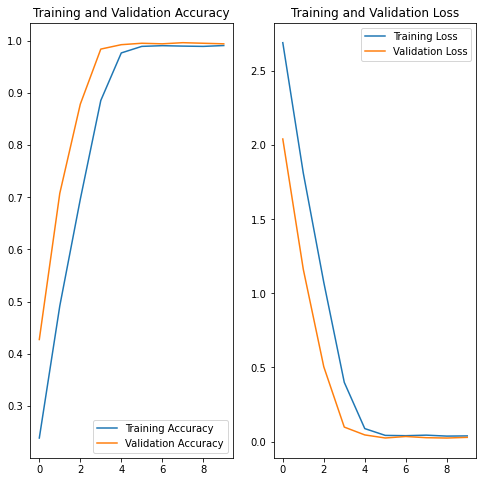

In [ ]:
#Visualize training results
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()